In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import OPTICS

In [2]:
dataset= pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x=dataset.iloc[:,[3,4]].values

In [31]:
clustModel= OPTICS(min_samples=10, xi=.05, min_cluster_size=.05)
Label=clustModel.fit_predict(x)
spvd=pd.DataFrame(dataset)
spvd['Cluster_group']=Label
spvd

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [32]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(Label)) - (1 if -1 in Label else 0)
n_noise_ = list(Label).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 6
Estimated number of noise points: 93


In [8]:
import seaborn as sns

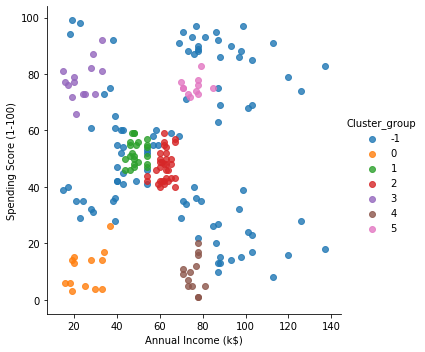

In [33]:
facet=sns.lmplot(data=spvd,x=spvd.columns[3],y=spvd.columns[4], hue=spvd.columns[5], fit_reg=False, legend=True,legend_out=True)